In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# File Paths
current_dir = os.path.abspath(os.curdir)
os.chdir("../..")
main_dir = os.path.abspath(os.curdir)
raw_data_path = os.path.join(main_dir,'data','raw')
raw_data_path

'/home/egbo/Desktop/car-price-prediction/data/raw'

In [4]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [5]:
car_data = pd.read_csv(raw_data_path+'/Car_price/all_car_data.csv')

## Basic Structure

In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11864 entries, 0 to 11863
Data columns (total 17 columns):
year             11792 non-null float64
brand            11864 non-null object
model            11864 non-null object
mileage          6878 non-null float64
condition        11864 non-null object
body_type        11864 non-null object
color            11864 non-null object
drive_type       11864 non-null object
fuel             11864 non-null object
drive_setup      11864 non-null object
transmission     11864 non-null object
interior_type    11864 non-null object
door_count       11677 non-null object
star             11864 non-null int64
review_no        11864 non-null int64
date_posted      11793 non-null object
price            11793 non-null float64
dtypes: float64(3), int64(2), object(12)
memory usage: 1.5+ MB


In [7]:
car_data.head()

,year,brand,model,mileage,condition,body_type,color,drive_type,fuel,drive_setup,transmission,interior_type,door_count,star,review_no,date_posted,price
0,2014.0,mercedes-benz,s550,26700.0,foreign used,saloons,silver,4 wheel drive,petrol,lefthand drive,automatic,leather,4,0,0,2020-07-16,27000000.0
1,2016.0,bmw,x5,53000.0,foreign used,4 wheel drives & suvs,white,4 wheel drive,petrol,lefthand drive,automatic,leather,4,0,0,2020-06-14,23000000.0
2,2019.0,land-rover,range-rover-vogue,4300.0,foreign used,4 wheel drives & suvs,black,4 wheel drive,petrol,lefthand drive,automatic,leather,4,0,0,2020-06-18,120000000.0
3,2011.0,lexus,gx,82500.0,foreign used,4 wheel drives & suvs,black,4 wheel drive,petrol,lefthand drive,automatic,leather,4,4,1,2020-07-18,12000000.0
4,2018.0,land-rover,range-rover-vogue,22500.0,foreign used,4 wheel drives & suvs,black,4 wheel drive,petrol,lefthand drive,automatic,leather,4,0,0,2020-07-18,50000000.0


In [6]:
# selecting multiple columns using a list of column name strings
car_data[['brand', 'model','body_type']]

,brand,model,body_type
0,mercedes-benz,s550,saloons
1,bmw,x5,4 wheel drives & suvs
2,land-rover,range-rover-vogue,4 wheel drives & suvs
3,lexus,gx,4 wheel drives & suvs
4,land-rover,range-rover-vogue,4 wheel drives & suvs
...,...,...,...
11859,mercedes-benz,ml350,4 wheel drives & suvs
11860,toyota,4-runner,4 wheel drives & suvs
11861,lexus,rx,4 wheel drives & suvs
11862,toyota,sienna,"buses, taxis and vans"


In [7]:
# filter rows based on the condition 
toyota_cars = car_data.loc[car_data.brand == 'toyota',:]
print('Number of toyota cars : {0}'.format(len(toyota_cars)))

Number of toyota cars : 5783


In [10]:
# use & or | operators to build complex logic
automatic_toyota_cars = car_data.loc[((car_data.brand == 'toyota') & (car_data.transmission == 'automatic')),:]
print('Number of automatic transmission toyota cars: {0}'.format(len(automatic_toyota_cars)))

Number of automatic transmission toyota cars: 5483


## Summary Statistics

In [8]:
# using .describe() to get statistics for all numeric columns
car_data.describe()

,year,mileage,star,review_no,price
count,11792.000000,6.878000e+03,11864.000000,11864.000000,1.179300e+04
mean,2009.448185,1.040554e+05,3.707940,12.204484,7.005898e+06
std,4.529105,4.214010e+05,2.058141,19.031618,1.258345e+07
min,1969.000000,1.000000e+00,0.000000,0.000000,4.000000e+00
25%,2006.000000,2.324975e+04,4.000000,1.000000,2.700000e+06
50%,2009.000000,6.395350e+04,5.000000,3.000000,3.950000e+06
75%,2013.000000,8.534525e+04,5.000000,8.000000,6.800000e+06
max,2020.000000,9.912351e+06,5.000000,56.000000,3.900000e+08


In [9]:
# numerical feature
# centrality measures
print('Mean price : {0}'.format(car_data.price.mean())) # mean
print('Median price : {0}'.format(car_data.price.median())) # median

Mean price : 7005898.318154838
Median price : 3950000.0


In [10]:
# dispersion measures
print('Min price : {0}'.format(car_data.price.min())) # minimum
print('Max price : {0}'.format(car_data.price.max())) # maximum
print('Price range : {0}'.format(car_data.price.max()  - car_data.price.min())) # range
print('25 percentile : {0}'.format(car_data.price.quantile(.25))) # 25 percentile
print('50 percentile : {0}'.format(car_data.price.quantile(.5))) # 50 percentile
print('75 percentile : {0}'.format(car_data.price.quantile(.75))) # 75 percentile
print('Variance price : {0}'.format(car_data.price.var())) # variance
print('Standard deviation price : {0}'.format(car_data.price.std())) # standard deviation

Min price : 4.0
Max price : 390000000.0
Price range : 389999996.0
25 percentile : 2700000.0
50 percentile : 3950000.0
75 percentile : 6800000.0
Variance price : 158343195795887.25
Standard deviation price : 12583449.280538594


<IPython.core.display.Javascript object>


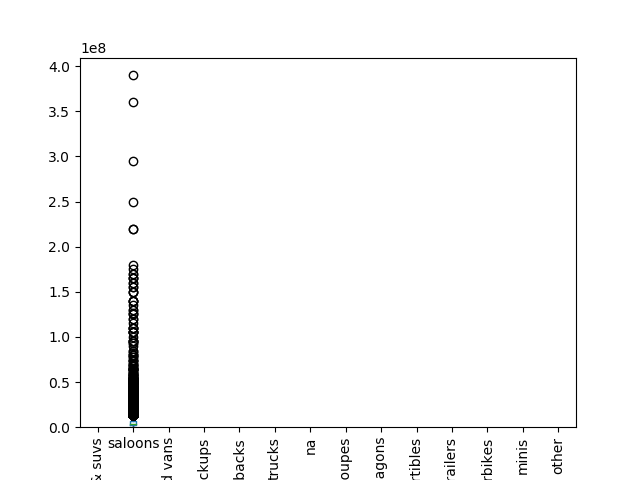

In [14]:
# box-whisker plot
car_data.price.plot(kind='box')

In [11]:
# use .describe(include='all') to get statistics for all  columns including non-numeric ones
car_data.describe(include='all')

,year,brand,model,mileage,condition,body_type,color,drive_type,fuel,drive_setup,transmission,interior_type,door_count,star,review_no,date_posted,price
count,11792.000000,11864,11864,6.878000e+03,11864,11864,11864,11864,11864,11864,11864,11864,11677,11864.000000,11864.000000,11793,1.179300e+04
unique,NaN,59,406,NaN,4,14,20,4,6,3,4,4,9,NaN,NaN,165,NaN
top,NaN,toyota,camry,NaN,foreign used,4 wheel drives & suvs,black,4 wheel drive,petrol,lefthand drive,automatic,leather,4.0,NaN,NaN,2020-08-12,NaN
freq,NaN,5783,1243,NaN,10230,5889,3147,7271,11550,11672,11199,8895,8901,NaN,NaN,332,NaN
mean,2009.448185,NaN,NaN,1.040554e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.707940,12.204484,NaN,7.005898e+06
std,4.529105,NaN,NaN,4.214010e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.058141,19.031618,NaN,1.258345e+07
min,1969.000000,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,4.000000e+00
25%,2006.000000,NaN,NaN,2.324975e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,1.000000,NaN,2.700000e+06
50%,2009.000000,NaN,NaN,6.395350e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,3.000000,NaN,3.950000e+06
75%,2013.000000,NaN,NaN,8.534525e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,8.000000,NaN,6.800000e+06


In [12]:
# categorical column : Counts
car_data.body_type.value_counts()

4 wheel drives & suvs    5889
saloons                  4184
buses, taxis and vans     790
pickups                   348
hatchbacks                226
trucks                    221
na                         71
coupes                     52
station wagons             33
convertibles               20
trailers                   15
motorbikes                  7
minis                       6
other                       2
Name: body_type, dtype: int64

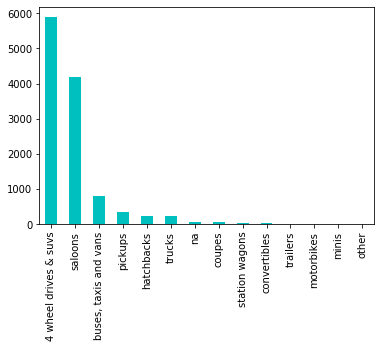

In [13]:
%matplotlib inline
car_data.body_type.value_counts().plot(kind = 'bar', color='c')

In [19]:
# categorical column : Proprotions
car_data.body_type.value_counts(normalize=True)

4 wheel drives & suvs    0.496376
saloons                  0.352664
buses, taxis and vans    0.066588
pickups                  0.029332
hatchbacks               0.019049
trucks                   0.018628
na                       0.005984
coupes                   0.004383
station wagons           0.002782
convertibles             0.001686
trailers                 0.001264
motorbikes               0.000590
minis                    0.000506
other                    0.000169
Name: body_type, dtype: float64

In [22]:
# non white vehicles
car_data[car_data.color != 'white'].color.value_counts() 

black         3147
silver        2008
grey          1468
red            726
blue           690
gold           687
dark grey      446
maroon         373
dark blue      293
green          211
brown          143
na              88
dark green      88
yellow          31
beige           28
other           25
orange          20
purple           3
pearl            1
Name: color, dtype: int64

In [23]:
# count : fuel type
car_data.fuel.value_counts()

petrol      11550
diesel        224
na             82
hybrid          5
electric        2
other           1
Name: fuel, dtype: int64

In [24]:
car_data.fuel.value_counts(normalize = True)

petrol      0.973533
diesel      0.018881
na          0.006912
hybrid      0.000421
electric    0.000169
other       0.000084
Name: fuel, dtype: float64

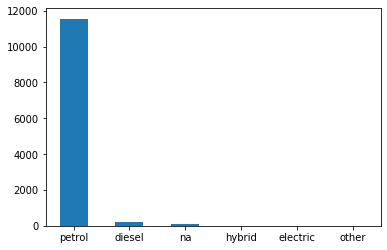

In [25]:
# distribution of fuel type
car_data.fuel.value_counts().plot(kind='bar', rot =0)

## Distributions

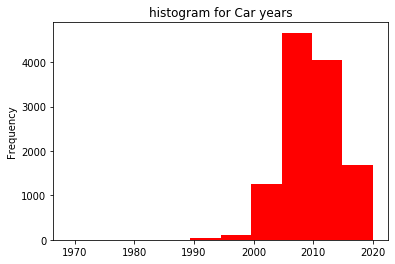

In [26]:
car_data.year.plot(kind='hist', title='histogram for Car years', color='red');

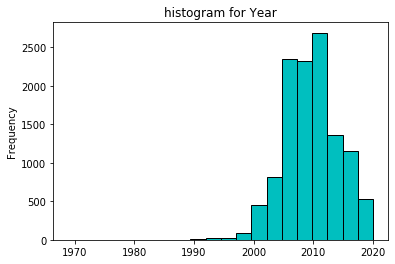

In [27]:
# use bins to add or remove bins
car_data.year.plot(kind='hist', title='histogram for Year', edgecolor= 'black', color='c', bins=20);

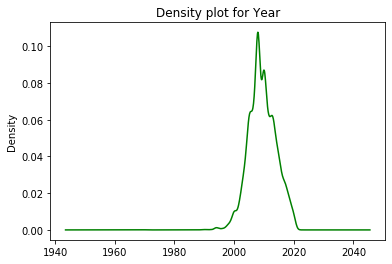

In [28]:
# use kde for density plot
car_data.year.plot(kind='kde', title='Density plot for Year', color='g');

In [29]:
car_data.door_count.value_counts()

4.0      8901
4        2222
2.0       304
3.0       167
2          44
3          20
0.0        11
5.0         7
Other       1
Name: door_count, dtype: int64

In [30]:
print('skewness for year : {0:.2f}'.format(car_data.year.skew()))
print('skewness for price : {0:.2f}'.format(car_data.price.skew()))

skewness for year : -0.13
skewness for price : 11.45


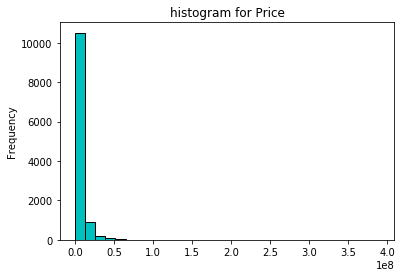

In [35]:
car_data.price.plot(kind='hist', title='histogram for Price', edgecolor= 'black', color='c', bins = 30);

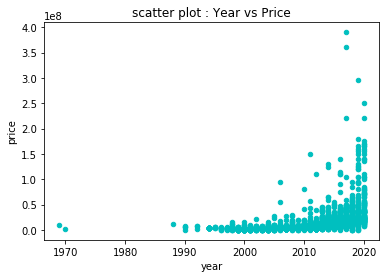

In [31]:
# use scatter plot for bi-variate distribution
car_data.plot.scatter(x='year', y='price', color='c', title='scatter plot : Year vs Price');

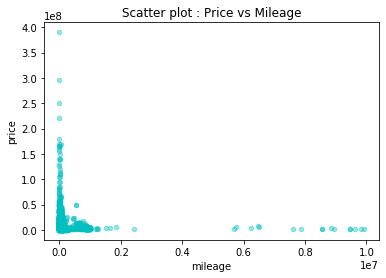

In [36]:
car_data.plot.scatter(x='mileage', y='price', color='c', title='Scatter plot : Price vs Mileage', alpha=0.4);

## Grouping & Aggregations

In [37]:
# group by 
car_data.groupby('drive_type').model.count()

drive_type
2 wheel drive    4344
4 wheel drive    7271
na                184
other              65
Name: model, dtype: int64

In [42]:
# group by 
car_data.groupby(['model']).price.median()

model
1021a              3400000.0
1113               6000000.0
1117               7000000.0
118i               1800000.0
1217               6500000.0
                     ...    
yaris              1860000.0
yaris-hatchback    2850000.0
z4                 3000000.0
zafira             1050000.0
zdx                8950000.0
Name: price, Length: 406, dtype: float64

In [14]:
car_data.groupby(['brand']).review_no.mean()

brand
acura             0.911215
audi              0.461538
bentley           0.000000
bike-master       0.000000
bmw               0.043478
buick             0.000000
cadillac          0.000000
chevrolet         1.100000
chrysler          0.000000
daewoo            0.000000
daf               0.000000
daihatsu          0.000000
denstar           0.000000
dodge             0.222222
fiat              0.000000
ford              0.606061
gmc               0.000000
honda            20.325733
howo              0.000000
hummer            0.000000
hyundai           0.754545
infiniti          0.028571
infinity          0.000000
isuzu             0.000000
iveco             0.000000
ivm               0.000000
jaguar            0.000000
jeep              0.000000
kia               1.260870
kymstone          0.000000
lamborghini       0.000000
land-rover        0.801980
lexus             2.637880
lincoln           0.000000
mack              0.000000
man               0.000000
mars              0.00

In [15]:
car_data.groupby(['brand'])['review_no','price'].median()

/home/danselem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,review_no,price
brand,,
acura,1.0,3300000.0
audi,0.0,4200000.0
bentley,0.0,35000000.0
bike-master,0.0,290000.0
bmw,0.0,4550000.0
buick,0.0,5000000.0
cadillac,0.0,8500000.0
chevrolet,1.5,8500000.0
chrysler,0.0,2800000.0


In [35]:
car_brand_model_price = car_data.groupby(['brand', 'model']).agg({'review_no' : 'mean', 'price' : 'median'})

In [36]:
car_brand_model_price.head(50)

review_no        price
brand       model                              
acura       mdx                1.0    3200000.0
            na                 1.0          NaN
            rdx                0.0    4850000.0
            rl                 0.0     850000.0
            tl                 0.0    3300000.0
            tsx                0.0    2975000.0
            zdx                0.0    8950000.0
audi        a6                 2.0    3510000.0
            q5                 0.0    9000000.0
            q7                 0.0    4200000.0
            tt                 0.0    1350000.0
bentley     arnage             0.0   28000000.0
            continental        0.0   40000000.0
bike-master galaxy             0.0     290000.0
bmw         118i               0.0    1800000.0
            3-series-gt        0.0    8500000.0
            320ci              0.0    1200000.0
            320d               0.0    2400000.0
            325i               1.0    2750000.0
            328i               0.0    4250000.0
            528i               0.0    5675000.0
            530i               0.0    2600000.0
            535i               0.0    4790000.0
            550i               0.0    6000000.0
            6-series           0.0   28200000.0
            7-series           0.0   57500000.0
            x3                 0.0    2125000.0
            x5                 0.0    4925000.0
            x6                 0.0    6050000.0
            x7                 0.0  105000000.0
            z4                 0.0    3000000.0
buick       enclave            0.0    5000000.0
cadillac    escalade           0.0   25750000.0
            xts                0.0    1500000.0
chevrolet   aveo               1.0     650000.0
            camaro             2.0    9500000.0
            express            0.0    2900000.0
            impala             0.0    2700000.0
            silverado          0.0    9350000.0
chrysler    160                0.0    2800000.0
            200                0.0    2550000.0
            300c               0.0    3000000.0
            crossfire          0.0    3200000.0
            e                  0.0    6000000.0
            pt-cruiser         0.0     550000.0
            town               0.0    1000000.0
daewoo      magnus             0.0     500000.0
daf         2560               0.0    9500000.0
            45                 0.0    4500000.0
            75-ati             0.0   10500000.0

In [56]:
car_data.groupby(['brand', 'model']).price.max()

brand  model
acura  mdx      14800000.0
       na              NaN
       rdx      10000000.0
       rl         850000.0
       tl        4900000.0
                   ...    
volvo  s60       2800000.0
       s80       3400000.0
       v40      22500000.0
       v90       1750000.0
       xc90      2600000.0
Name: price, Length: 417, dtype: float64

In [17]:
car_data.columns

Index(['year', 'brand', 'model', 'mileage', 'condition', 'body_type', 'color',
       'drive_type', 'fuel', 'drive_setup', 'transmission', 'interior_type',
       'door_count', 'star', 'review_no', 'date_posted', 'price'],
      dtype='object')

## Crosstab

In [22]:
#crosstab on Sex and Pclass
pd.crosstab(car_data.body_type, car_data.condition)

condition,brand new,foreign used,locally used,na
body_type,,,,
4 wheel drives & suvs,101,5182,606,0
"buses, taxis and vans",7,692,91,0
convertibles,0,17,3,0
coupes,0,42,10,0
hatchbacks,1,196,29,0
minis,0,5,1,0
motorbikes,6,1,0,0
na,0,0,0,71
other,0,1,1,0


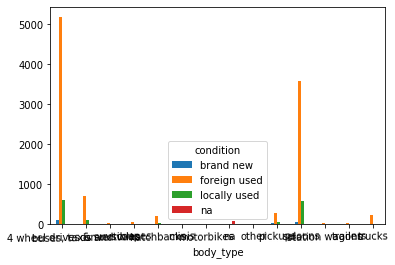

In [21]:
pd.crosstab(car_data.body_type, car_data.condition).plot(kind='bar', rot = 1);

## Pivots

In [23]:
# pivot table
car_data.pivot_table(index='body_type',columns = 'condition',values='price', aggfunc='mean')

condition,brand new,foreign used,locally used
body_type,,,
4 wheel drives & suvs,6.836926e+07,8.427599e+06,4.719277e+06
"buses, taxis and vans",3.471429e+07,4.100236e+06,3.141718e+06
convertibles,NaN,4.081176e+06,5.376667e+06
coupes,NaN,1.220167e+07,6.119000e+06
hatchbacks,2.250000e+07,2.896709e+06,1.653793e+06
minis,NaN,2.490000e+06,9.000000e+05
motorbikes,2.966667e+05,7.000000e+06,NaN
other,NaN,1.400000e+07,4.300000e+07
pickups,2.150459e+07,7.778577e+06,5.445712e+06


In [24]:
car_data.groupby(['body_type','condition']).price.mean().unstack()

condition,brand new,foreign used,locally used,na
body_type,,,,
4 wheel drives & suvs,6.836926e+07,8.427599e+06,4.719277e+06,NaN
"buses, taxis and vans",3.471429e+07,4.100236e+06,3.141718e+06,NaN
convertibles,NaN,4.081176e+06,5.376667e+06,NaN
coupes,NaN,1.220167e+07,6.119000e+06,NaN
hatchbacks,2.250000e+07,2.896709e+06,1.653793e+06,NaN
minis,NaN,2.490000e+06,9.000000e+05,NaN
motorbikes,2.966667e+05,7.000000e+06,NaN,NaN
na,NaN,NaN,NaN,NaN
other,NaN,1.400000e+07,4.300000e+07,NaN


## Data Munging : Working with missing values

In [6]:
# use .info() to detect missing values (if any)
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11864 entries, 0 to 11863
Data columns (total 17 columns):
year             11792 non-null float64
brand            11864 non-null object
model            11864 non-null object
mileage          6878 non-null float64
condition        11864 non-null object
body_type        11864 non-null object
color            11864 non-null object
drive_type       11864 non-null object
fuel             11864 non-null object
drive_setup      11864 non-null object
transmission     11864 non-null object
interior_type    11864 non-null object
door_count       11677 non-null object
star             11864 non-null int64
review_no        11864 non-null int64
date_posted      11793 non-null object
price            11793 non-null float64
dtypes: float64(3), int64(2), object(12)
memory usage: 1.5+ MB


## Feature : Year

In [7]:
# extract rows with year as Null
print(car_data[car_data.year.isnull()])
print(len(car_data[car_data.year.isnull()]))

       year          brand  model  mileage     condition  \
1332    NaN             na     na      NaN            na   
5883    NaN  mercedes-benz  ml350  88000.0  foreign used   
7159    NaN         toyota     na      NaN            na   
7163    NaN             na     na      NaN            na   
7169    NaN           ford     na      NaN            na   
7174    NaN         toyota     na      NaN            na   
7181    NaN         toyota     na      NaN            na   
7686    NaN             na     na      NaN            na   
9143    NaN         toyota     na      NaN            na   
9150    NaN  mercedes-benz     na      NaN            na   
9311    NaN         toyota     na      NaN            na   
9317    NaN             na     na      NaN            na   
9328    NaN          lexus     na      NaN            na   
9350    NaN         toyota     na      NaN            na   
9351    NaN         toyota     na      NaN            na   
9736    NaN         toyota     na      N

72 vehicles have year value. Also 71 of them had is null values all through except for 1 which has other features complete except for year.

In [8]:
# extract rows with year as Null all through
car_data[car_data.year.isnull() & ~car_data.mileage.notnull()]
print(len(car_data[car_data.year.isnull() & ~car_data.mileage.notnull()]))

71


In [9]:
car_wo_yr_vl = car_data[car_data.year.isnull() & ~car_data.mileage.notnull()]

In [12]:
car_wo_yr_vl

,year,brand,model,mileage,condition,body_type,color,drive_type,fuel,drive_setup,transmission,interior_type,door_count,star,review_no,date_posted,price
1332,NaN,na,na,NaN,na,na,na,na,na,na,na,na,NaN,0,0,NaN,NaN
7159,NaN,toyota,na,NaN,na,na,na,na,na,na,na,na,NaN,5,56,NaN,NaN
7163,NaN,na,na,NaN,na,na,na,na,na,na,na,na,NaN,5,56,NaN,NaN
7169,NaN,ford,na,NaN,na,na,na,na,na,na,na,na,NaN,5,1,NaN,NaN
7174,NaN,toyota,na,NaN,na,na,na,na,na,na,na,na,NaN,5,56,NaN,NaN
7181,NaN,toyota,na,NaN,na,na,na,na,na,na,na,na,NaN,5,56,NaN,NaN
7686,NaN,na,na,NaN,na,na,na,na,na,na,na,na,NaN,0,0,NaN,NaN
9143,NaN,toyota,na,NaN,na,na,na,na,na,na,na,na,NaN,5,56,NaN,NaN
9150,NaN,mercedes-benz,na,NaN,na,na,na,na,na,na,na,na,NaN,5,2,NaN,NaN
9311,NaN,toyota,na,NaN,na,na,na,na,na,na,na,na,NaN,4,5,NaN,NaN


In [10]:
print(len(car_data))
car_data = car_data.drop(car_wo_yr_vl.index, axis=0)
print(len(car_data))

11864
11793


In [11]:
car_data[car_data.year.isnull()]

,year,brand,model,mileage,condition,body_type,color,drive_type,fuel,drive_setup,transmission,interior_type,door_count,star,review_no,date_posted,price
5883,NaN,mercedes-benz,ml350,88000.0,foreign used,4 wheel drives & suvs,other,4 wheel drive,petrol,lefthand drive,automatic,leather,4.0,0,0,2020-06-04,10800000.0


In [15]:
car_data[car_data.model == 'ml350'].groupby(['condition','model']).year.median().unstack()

model,ml350
condition,
foreign used,2010.0
locally used,2008.0


In [12]:
# replace the missing values with 'C'
car_data.year.fillna(2010, inplace=True)

In [13]:
car_data[car_data.year.isnull()]

,year,brand,model,mileage,condition,body_type,color,drive_type,fuel,drive_setup,transmission,interior_type,door_count,star,review_no,date_posted,price


In [18]:
car_data.columns

Index(['year', 'brand', 'model', 'mileage', 'condition', 'body_type', 'color',
       'drive_type', 'fuel', 'drive_setup', 'transmission', 'interior_type',
       'door_count', 'star', 'review_no', 'date_posted', 'price'],
      dtype='object')

## Feature : Brand

In [14]:
car_data[car_data.brand.isnull()]

,year,brand,model,mileage,condition,body_type,color,drive_type,fuel,drive_setup,transmission,interior_type,door_count,star,review_no,date_posted,price


## Feature Model

The model feature is sorted out as there are no erroneous values. Let s confirm by using the `value_counts()` and `unique` methods.

In [15]:
car_data.model.value_counts()

camry                 1243
corolla                882
rx                     815
highlander             780
es                     645
rav4                   530
ml350                  499
sienna                 394
mdx                    384
gx                     341
4-runner               339
accord                 296
venza                  286
avalon                 216
glk                    211
c300                   200
tacoma                 140
dyna                   135
hiace                  123
matrix                 120
sequoia                111
e350                   106
cr-v                   102
land-cruiser-prado      98
gl-450                  97
lx                      90
pilot                   90
hilux                   81
edge                    80
range-rover-sport       78
land-cruiser            76
is                      66
transporter             64
pathfinder              58
gl-class                46
tundra                  44
lt                      44
r

In [23]:
car_data.model.unique()

array(['s550', 'x5', 'range-rover-vogue', 'gx', 'range-rover-sport',
       'gle-43', 'lx', 'land-cruiser', 'rx', 'gle-350', 'highlander',
       'c450', 'glk', 'ml350', 'e350', 'g-63-amg', 'cla-class', 'venza',
       'c300', 'es', 'cr-v', 'accord', 'civic', 'tucson', 'e320', 'c350',
       'impala', '3', 'jetta', 'camry', 'gt', 'ls', 'corolla', 'optima',
       'matrix', 'sienna', 'gallardo', 'rav4', 'genlyon', 'explorer',
       'c63', '7-series', 'gl-450', 'qx80', 'is', 'tl', 'scion',
       '4-runner', 'f-150', 'land-cruiser-prado', 'edge', 'hilux',
       'hiace', 't100', 'vito', 'fj-cruiser', '300c', 'coaster', 'l200',
       'pathfinder', 'pilot', 'ml-320', 'transporter', 'cabstar',
       'ml-550', 'avalon', 'gs', '325i', 'tacoma', 'gl-class', 'avensis',
       'mdx', 'gle', 'fx', '406', 'vibe', 'sequoia', 'lr4', 'previa',
       'gl-550', 'verso', 'f-650', '1620', 'zdx', 'dyna', 'm-class', 'lt',
       'almera-tino', 'picnic', 'eurostar', 'transit', 'g63', 'passat',
       'c

In [24]:
car_data.condition.unique()

array(['foreign used', 'brand new', 'locally used'], dtype=object)

All good. No cause for worry now.

## Feature Mileage



In [23]:
null_values = car_data.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot = len(car_data)
null_values['percent'] = null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
mileage,491500,41.677
door_count,11600,0.984
year,0,0.000
drive_setup,0,0.000
date_posted,0,0.000
review_no,0,0.000
star,0,0.000
interior_type,0,0.000
transmission,0,0.000
fuel,0,0.000


In [16]:
car_data[car_data.mileage.isnull()].head(10)
len(car_data[car_data.mileage.isnull()])

4915

Wooh! 4915 cars have no mileage. 

In [26]:
car_data.condition.unique()

array(['foreign used', 'brand new', 'locally used'], dtype=object)

Lets estimate the mileage value based on car condition and use the estimates to replace the missing value.

In [17]:
fu_mile_median = car_data[car_data['condition'] == 'foreign used']['mileage'].median()
print(fu_mile_median)
bn_mile_mean = car_data[car_data['condition'] == 'brand new']['mileage'].mean()
bn_mile_mean = round(bn_mile_mean, 2)
print(bn_mile_mean)
lu_mile_median = car_data[car_data['condition'] == 'locally used']['mileage'].median()
print(lu_mile_median)

63212.0
3973.45
76536.0


In [18]:
car_data.loc[car_data['condition'] == 'foreign used', 'mileage'] = car_data.loc[
    car_data['condition'] == 'foreign used', 'mileage'].fillna(fu_mile_median)

In [19]:
car_data.loc[car_data['condition'] == 'locally used', 'mileage'] = car_data.loc[
    car_data['condition'] == 'locally used', 'mileage'].fillna(lu_mile_median)

In [20]:
car_data.loc[car_data['condition'] == 'brand new', 'mileage'] = car_data.loc[
    car_data['condition'] == 'brand new', 'mileage'].fillna(bn_mile_mean)

In [21]:
print(len(car_data[car_data.mileage.isnull()]))
car_data[car_data.mileage.isnull()]

0


,year,brand,model,mileage,condition,body_type,color,drive_type,fuel,drive_setup,transmission,interior_type,door_count,star,review_no,date_posted,price


In [32]:
car_data.condition.value_counts()

foreign used    10230
locally used     1367
brand new         196
Name: condition, dtype: int64

In [22]:
car_data.body_type.value_counts()

4 wheel drives & suvs    5889
saloons                  4184
buses, taxis and vans     790
pickups                   348
hatchbacks                226
trucks                    221
coupes                     52
station wagons             33
convertibles               20
trailers                   15
motorbikes                  7
minis                       6
other                       2
Name: body_type, dtype: int64

Changing brand with nx to SUV, also body types like other, motorbikes and minis

In [23]:
car_data.loc[
    ((car_data['brand'] == 'nx') & (car_data['body_type'] == 'other')), 'body_type'] = '4 wheel drives & suvs'

In [24]:
car_data.loc[car_data['body_type'] == 'other', 'body_type'] = 'convertibles'

In [25]:
car_data.loc[car_data['body_type'] == 'buses, taxis and vans', 'body_type'] = 'buses'

In [26]:
car_data.loc[car_data['body_type'] == '4 wheel drives & suvs', 'body_type'] = 'suvs'

In [27]:
car_data.loc[car_data['body_type'] == 'station wagons', 'body_type'] = 'wagons'

Dropping rows with motorbikes and minis body type.

In [28]:
index_name = car_data[car_data['body_type'].isin(['motorbikes', 'minis'])].index

car_data.drop(index_name, inplace=True)

In [29]:
car_data[car_data.body_type == 'suvs'].head()

,year,brand,model,mileage,condition,body_type,color,drive_type,fuel,drive_setup,transmission,interior_type,door_count,star,review_no,date_posted,price
1,2016.0,bmw,x5,53000.0,foreign used,suvs,white,4 wheel drive,petrol,lefthand drive,automatic,leather,4,0,0,2020-06-14,23000000.0
2,2019.0,land-rover,range-rover-vogue,4300.0,foreign used,suvs,black,4 wheel drive,petrol,lefthand drive,automatic,leather,4,0,0,2020-06-18,120000000.0
3,2011.0,lexus,gx,82500.0,foreign used,suvs,black,4 wheel drive,petrol,lefthand drive,automatic,leather,4,4,1,2020-07-18,12000000.0
4,2018.0,land-rover,range-rover-vogue,22500.0,foreign used,suvs,black,4 wheel drive,petrol,lefthand drive,automatic,leather,4,0,0,2020-07-18,50000000.0
5,2014.0,land-rover,range-rover-sport,23000.0,foreign used,suvs,gold,4 wheel drive,petrol,lefthand drive,automatic,leather,4,4,1,2020-07-16,21000000.0


In [30]:
car_data[car_data.body_type == 'minis']

,year,brand,model,mileage,condition,body_type,color,drive_type,fuel,drive_setup,transmission,interior_type,door_count,star,review_no,date_posted,price


In [31]:
len(car_data)

11780

## Feature Color


In [32]:
car_data.color.value_counts()

black         3146
silver        2008
grey          1468
white         1388
red            722
blue           689
gold           686
dark grey      446
maroon         370
dark blue      293
green          209
brown          143
dark green      88
yellow          30
beige           28
other           25
orange          20
na              17
purple           3
pearl            1
Name: color, dtype: int64

The most common color is black hence we assign rows with color other and na to black.

In [33]:
car_data.loc[car_data['color'] == 'other', 'color'] = 'black'

In [34]:
car_data.loc[car_data['color'] == 'na', 'color'] = 'black'

## Feature Drive Type

In [35]:
car_data.drive_type.value_counts()

4 wheel drive    7270
2 wheel drive    4334
na                113
other              63
Name: drive_type, dtype: int64

In [36]:
car_data[car_data.drive_type == 'na'].body_type.value_counts()

suvs          58
saloons       43
buses          6
trucks         3
hatchbacks     2
wagons         1
Name: body_type, dtype: int64

In [50]:
pd.crosstab(car_data.body_type, car_data.drive_type)

drive_type,2 wheel drive,4 wheel drive,na,other
body_type,,,,
buses,81,699,6,4
convertibles,20,2,0,0
coupes,45,7,0,0
hatchbacks,187,37,2,0
pickups,31,313,0,4
saloons,3889,246,43,6
suvs,35,5749,58,47
trailers,0,14,0,1
trucks,19,198,3,1


In [37]:
car_data.loc[((car_data['drive_type'] == 'na') &
              (car_data['body_type'] == 'suvs')), 'drive_type'] = '4 wheel drive'
car_data.loc[((car_data['drive_type'] == 'other') &
              (car_data['body_type'] == 'suvs')), 'drive_type'] = '4 wheel drive'

In [38]:
car_data.loc[((car_data['drive_type'] == 'na') &
              (car_data['body_type'] == 'saloons')), 'drive_type'] = '2 wheel drive'

car_data.loc[((car_data['drive_type'] == 'other') &
              (car_data['body_type'] == 'saloons')), 'drive_type'] = '2 wheel drive'

car_data.loc[((car_data['drive_type'] == 'na') &
              (car_data['body_type'] == 'buses')), 'drive_type'] = '4 wheel drive'

car_data.loc[((car_data['drive_type'] == 'other') &
              (car_data['body_type'] == 'buses')), 'drive_type'] = '4 wheel drive'

car_data.loc[((car_data['drive_type'] == 'na') &
              (car_data['body_type'] == 'hatchbacks')), 'drive_type'] = '2 wheel drive'

car_data.loc[((car_data['drive_type'] == 'other') &
              (car_data['body_type'] == 'pickups')), 'drive_type'] = '4 wheel drive'

car_data.loc[((car_data['drive_type'] == 'other') &
              (car_data['body_type'] == 'trailers')), 'drive_type'] = '4 wheel drive'

car_data.loc[((car_data['drive_type'] == 'na') &
              (car_data['body_type'] == 'trucks')), 'drive_type'] = '4 wheel drive'

car_data.loc[((car_data['drive_type'] == 'other') &
              (car_data['body_type'] == 'trucks')), 'drive_type'] = '4 wheel drive'

car_data.loc[((car_data['drive_type'] == 'na') &
              (car_data['body_type'] == 'wagons')), 'drive_type'] = '2 wheel drive'

In [ ]:
## Feature Fuel

In [39]:
car_data.fuel.value_counts()

petrol      11537
diesel        224
na             11
hybrid          5
electric        2
other           1
Name: fuel, dtype: int64

In [135]:
car_data[car_data.fuel.isin(['na', 'other', 'hybrid'])]
# Body types are all saloons and suv

,year,brand,model,mileage,condition,body_type,color,drive_type,fuel,drive_setup,transmission,interior_type,door_count,star,review_no,date_posted,price
1191,2006.0,toyota,highlander,945123.0,foreign used,suvs,gold,4 wheel drive,na,na,automatic,leather,NaN,5,8,2020-08-04,3250000.0
1374,2015.0,toyota,highlander,38000.0,foreign used,suvs,grey,4 wheel drive,na,lefthand drive,automatic,leather,4.0,5,8,2020-07-09,12500000.0
1813,2015.0,lexus,is,85000.0,foreign used,saloons,silver,4 wheel drive,hybrid,lefthand drive,automatic,leather,4.0,5,1,2020-08-21,7500000.0
1836,2015.0,lexus,is,85000.0,foreign used,saloons,silver,4 wheel drive,hybrid,lefthand drive,automatic,leather,4.0,5,1,2020-08-25,7500000.0
1837,2015.0,lexus,is,85000.0,foreign used,saloons,silver,4 wheel drive,hybrid,lefthand drive,automatic,leather,4.0,5,1,2020-08-25,7500000.0
2592,2006.0,acura,mdx,63212.0,foreign used,suvs,black,4 wheel drive,na,na,automatic,leather,NaN,5,1,2020-05-07,2000000.0
3087,2014.0,land-rover,range-rover-sport,45000.0,foreign used,suvs,dark blue,4 wheel drive,na,lefthand drive,automatic,na,4.0,4,1,2020-06-30,20000000.0
3103,2017.0,mercedes-benz,gle-43,25000.0,foreign used,suvs,black,4 wheel drive,na,na,automatic,na,NaN,0,0,2020-07-03,26500000.0
3869,2005.0,toyota,corolla,200.0,foreign used,saloons,black,2 wheel drive,na,na,automatic,na,NaN,5,42,2020-06-25,1900000.0
4115,2008.0,mercedes-benz,gl-class,56767.0,foreign used,suvs,grey,4 wheel drive,na,lefthand drive,automatic,na,4.0,4,1,2020-07-24,5450000.0


In [40]:
car_data.loc[car_data.fuel.isin(['na', 'other']), 'fuel'] = 'petrol'

## Feature Drive Setup

In [41]:
car_data.drive_setup.value_counts()

lefthand drive     11662
na                   104
righthand drive       14
Name: drive_setup, dtype: int64

In [140]:
car_data[car_data.drive_setup == 'na']
# Nigerian cars are mostly lefthand

,year,brand,model,mileage,condition,body_type,color,drive_type,fuel,drive_setup,transmission,interior_type,door_count,star,review_no,date_posted,price
1191,2006.0,toyota,highlander,945123.0,foreign used,suvs,gold,4 wheel drive,petrol,na,automatic,leather,NaN,5,8,2020-08-04,3250000.0
1399,2003.0,lexus,rx,95312.0,foreign used,suvs,grey,4 wheel drive,petrol,na,automatic,leather,NaN,5,1,2020-06-18,2200000.0
1400,2000.0,lexus,rx,90763.0,foreign used,suvs,silver,4 wheel drive,petrol,na,automatic,leather,NaN,5,1,2020-06-18,1900000.0
1413,2013.0,lexus,lx,23107.0,foreign used,suvs,black,4 wheel drive,petrol,na,automatic,leather,NaN,5,2,2020-06-18,15000000.0
1418,2013.0,lexus,lx,23107.0,foreign used,suvs,black,4 wheel drive,petrol,na,automatic,leather,NaN,5,2,2020-06-18,15000000.0
1502,2014.0,mercedes-benz,cls,84946.0,foreign used,saloons,black,2 wheel drive,petrol,na,automatic,leather,4.0,0,0,2020-07-31,12500000.0
1564,2019.0,nissan,pathfinder,20.0,foreign used,suvs,black,4 wheel drive,petrol,na,automatic,leather,4.0,4,4,2020-05-11,17800000.0
1727,2004.0,toyota,camry,25.0,foreign used,saloons,black,2 wheel drive,petrol,na,automatic,cloth,NaN,5,56,2020-05-19,1700000.0
1743,2013.0,toyota,corolla,15680.0,foreign used,saloons,black,2 wheel drive,petrol,na,automatic,cloth,4.0,5,42,2020-05-19,3800000.0
1942,2018.0,toyota,camry,22000.0,foreign used,saloons,black,2 wheel drive,petrol,na,automatic,leather,NaN,5,56,2020-06-04,19500000.0


In [42]:
car_data.loc[car_data.drive_setup == 'na', 'drive_setup'] = 'lefthand drive'

## Feature Transmission

In [45]:
car_data.transmission.value_counts()

automatic    11209
manual         571
Name: transmission, dtype: int64

In [44]:
car_data.loc[car_data['transmission'] == 'na', 'transmission'] = 'automatic'
car_data.loc[car_data['transmission'] == 'other', 'transmission'] = 'manual'

## Feature Interior

In [48]:
car_data.interior_type.value_counts()

leather    8920
cloth      2860
Name: interior_type, dtype: int64

In [47]:
car_data.loc[car_data['interior_type'] == 'other', 'interior_type'] = 'leather'
car_data.loc[car_data['interior_type'] == 'na', 'interior_type'] = 'cloth'

## Feature Door Count

In [52]:
car_data.door_count.value_counts()

4    11136
2      341
3      187
Name: door_count, dtype: int64

In [51]:
car_data.loc[car_data['door_count'] == '4.0', 'door_count'] = 4
car_data.loc[car_data['door_count'] == '2.0', 'door_count'] = 2
car_data.loc[car_data['door_count'] == '3.0', 'door_count'] = 3
car_data.loc[car_data['door_count'] == '5.0', 'door_count'] = 4
car_data.loc[car_data['door_count'] == '3', 'door_count'] = 3
car_data.loc[car_data['door_count'] == '4', 'door_count'] = 4
car_data.loc[car_data['door_count'] == '2', 'door_count'] = 2
car_data.loc[car_data['door_count'] == '0.0', 'door_count'] = 4
car_data.loc[car_data['door_count'] == 'Other', 'door_count'] = 4

In [53]:
car_data.star.value_counts()

5    7463
0    2715
4    1577
3      19
1       5
2       1
Name: star, dtype: int64

In [54]:
car_data.review_no.value_counts()

0     2715
1     2193
56    1243
7      902
42     882
8      780
6      747
3      672
2      596
4      499
37     296
5      216
19      39
Name: review_no, dtype: int64

In [72]:
len(car_data[car_data.price <= 500000])
car_data[car_data.price <= 500000]

,year,brand,model,mileage,condition,body_type,color,drive_type,fuel,drive_setup,transmission,interior_type,door_count,star,review_no,date_posted,price
3029,2000.0,honda,accord,71000.0,locally used,saloons,blue,2 wheel drive,petrol,lefthand drive,automatic,cloth,4,5,37,2020-08-26,420000.0
3325,2004.0,bmw,320ci,266000.0,foreign used,coupes,grey,2 wheel drive,petrol,lefthand drive,automatic,leather,2,0,0,2020-07-23,200000.0
3329,2000.0,honda,accord,145083.0,locally used,saloons,silver,2 wheel drive,petrol,lefthand drive,automatic,cloth,4,5,37,2020-08-10,400000.0
5644,2001.0,honda,accord,71000.0,locally used,saloons,gold,2 wheel drive,petrol,lefthand drive,automatic,cloth,4,5,37,2020-09-02,410000.0
6019,2000.0,honda,accord,90.0,locally used,saloons,black,2 wheel drive,petrol,lefthand drive,automatic,leather,4,5,37,2020-08-17,450000.0
7425,1996.0,toyota,camry,146377.0,locally used,saloons,black,2 wheel drive,petrol,lefthand drive,automatic,leather,4,5,56,2020-06-12,420000.0
8322,2000.0,honda,accord,120854.0,locally used,saloons,white,2 wheel drive,petrol,lefthand drive,automatic,leather,4,5,37,2020-08-28,490000.0
8955,2004.0,daewoo,magnus,225021.0,locally used,saloons,black,2 wheel drive,petrol,lefthand drive,automatic,leather,4,0,0,2020-08-01,500000.0


In [61]:
car_data.loc[car_data['price'] == 6.0, 'price'] = 6000000

In [63]:
car_data.loc[car_data['price'] == 4.0, 'price'] = 4000000
car_data.loc[car_data['price'] == 4200.0, 'price'] = 4200000

In [49]:
print(cd_n[cd_n.mileage < 100].shape)
print(cd_n[cd_n.mileage > 300000].shape)
cd_n = cd_n[(cd_n.mileage < 300000) & (cd_n.mileage > 100)]
cd_n[cd_n.year>1985]
cd_n.shape

NameError: name 'cd_n' is not defined